In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [4]:
BASBCOPD = pd.read_csv('DataOPDRegressionBaSBC.csv',encoding ='TIS-620')

In [5]:
BASBCOPD.head()

,Month,Regional,Branch,Host,T.Visit,A.Visit,Target,Actual
0,พ.ค.,ชลธิชา หอมหวล-อีสาน,ET0036-บริษัท กาฬสินธุ์พลาซ่า จำกัด-0,51150066-สุวรรณา ถุนพุฒดม-L,5,0,6485,0
1,พ.ค.,ชลธิชา หอมหวล-อีสาน,ET0069-บริษัท คลังพลาซ่า จำกัด-0,01210063-สอิ้ง กิมโสม-A,1,0,2230,0
2,พ.ค.,ชลธิชา หอมหวล-อีสาน,ET2047-บริษัท คลังพลาซ่าจอมสุรางค์ จำกัด-0,01160029-รัชนี เฉลิมลาภ-A,4,3,7615,0
3,พ.ค.,ชลธิชา หอมหวล-อีสาน,ET4759-บริษัท เสริมไทยคอมเพล็กซ์ จำกัด-0,51150062-จีรภรณ์ นิกรถา-A,10,6,15825,0
4,พ.ค.,ชลธิชา หอมหวล-อีสาน,ET6018-บริษัท โรบินสัน จำกัด (มหาชน)สาขา มุกดา...,51130348-ฐานะดา มูลไชสง-A,13,2,12095,5830


In [6]:
BASBCOPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 8 columns):
Month       674 non-null object
Regional    674 non-null object
Branch      674 non-null object
Host        674 non-null object
T.Visit     674 non-null int64
A.Visit     674 non-null int64
Target      674 non-null int64
Actual      674 non-null int64
dtypes: int64(4), object(4)
memory usage: 42.2+ KB


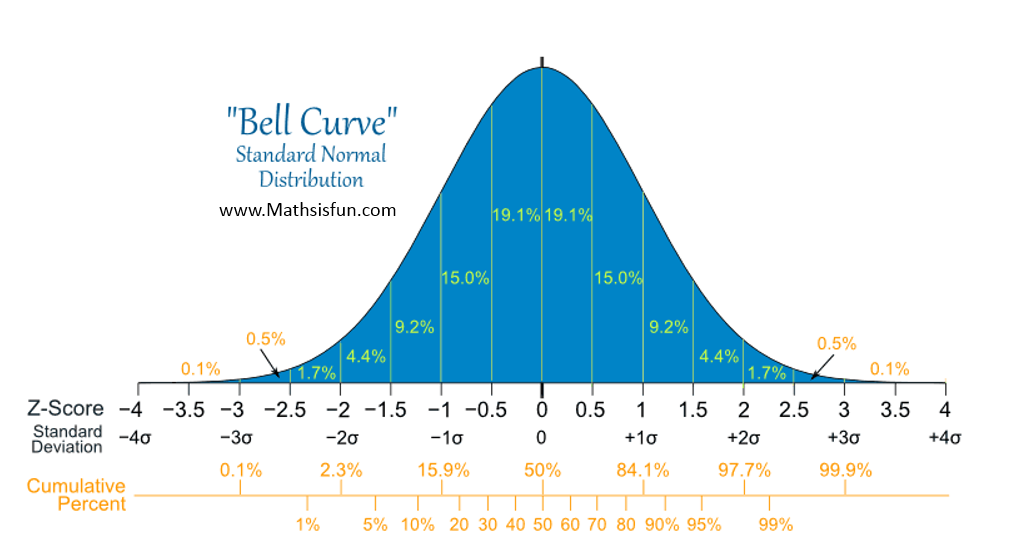

In [59]:
Image(filename='normal distribution.png')

In [60]:
BASBCOPD.describe()

,T.Visit,A.Visit,Target,Actual
count,674.000000,674.000000,674.000000,674.000000
mean,15.077151,9.646884,25009.866469,18389.520772
std,15.231448,12.084765,33846.144013,36721.912580
min,1.000000,0.000000,0.000000,0.000000
25%,2.250000,1.000000,2400.000000,0.000000
50%,10.000000,4.500000,12072.500000,1322.500000
75%,23.000000,14.750000,34782.500000,21881.250000
max,73.000000,63.000000,283145.000000,386045.000000


In [61]:
BASBCOPD.columns

Index(['Month', 'Regional', 'Branch', 'Host', 'T.Visit', 'A.Visit', 'Target',
       'Actual'],
      dtype='object')

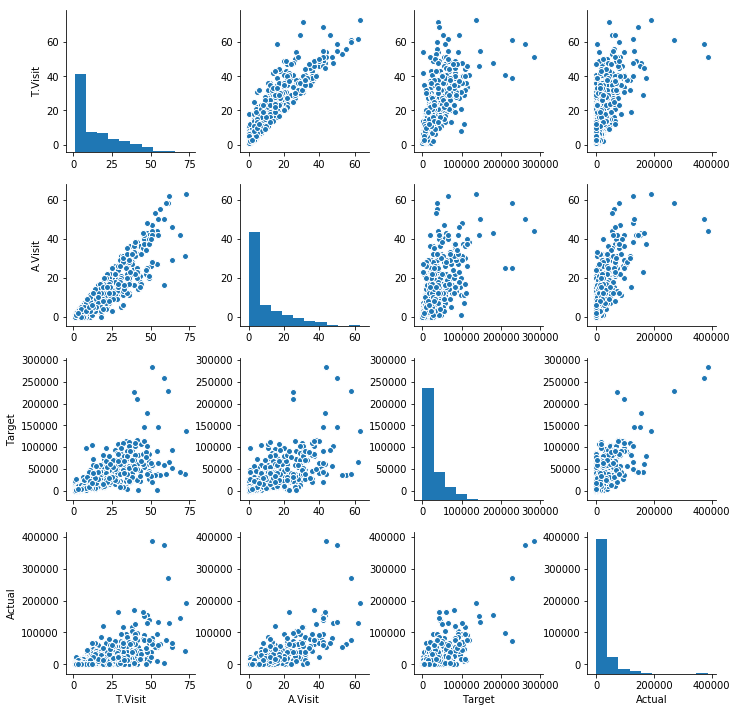

In [62]:
sns.pairplot(BASBCOPD)

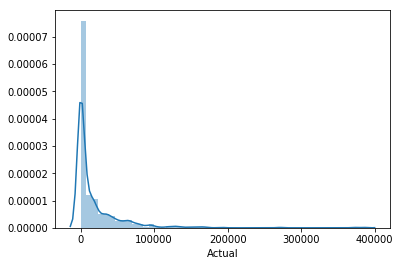

In [69]:
sns.distplot(BASBCOPD['Actual'])

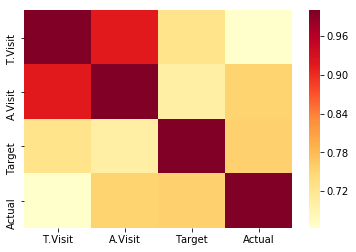

In [70]:
sns.heatmap(BASBCOPD.corr(), cmap="YlOrRd")

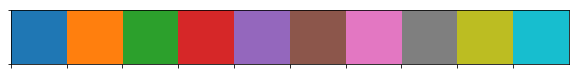

In [71]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [7]:
X = BASBCOPD[['A.Visit']]

In [8]:
y = BASBCOPD['Actual'] 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# print the intercept
print(lm.intercept_)

-2237.81738828


In [15]:
# print the coefficient
print(lm.coef_)

[ 2083.87491128]


In [16]:
predictions = lm.predict(X_test)

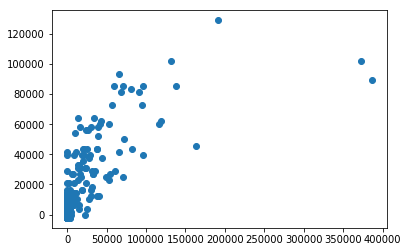

In [17]:
plt.scatter(y_test,predictions)

In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
A.Visit,2083.874911


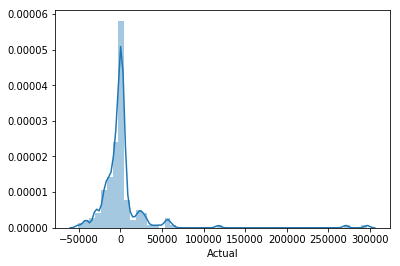

In [19]:
sns.distplot((y_test-predictions),bins=50);

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14194.8099244
MSE: 1148933231.1
RMSE: 33895.917617


In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test, predictions)

0.4896293779394516